In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data_amazon = pd.read_csv('amazon_data.csv')
data_amazon.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
data_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [4]:
data_amazon.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [ ]:
# Create a crosstab between the product category and the isBestSeller status.

# Are there categories where being a best-seller is more prevalent?

#Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [5]:
crosstable = pd.crosstab(data_amazon['category'], data_amazon['isBestSeller'])
crosstable

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [16]:
crosstable = pd.crosstab(data_amazon['category'], data_amazon['isBestSeller'])

crosstable['proportionBestSellers'] = crosstable[True] / (crosstable[True] + crosstable[False])

top_5_categories = crosstable.sort_values(by='proportionBestSellers', ascending=False)

print(top_5_categories[['proportionBestSellers']].head(10))

isBestSeller                    proportionBestSellers
category                                             
Grocery                                      0.058135
Smart Home Security & Lighting               0.057692
Health & Personal Care                       0.057686
Mobile Phone Accessories                     0.042471
Power & Hand Tools                           0.035339
Billiard, Snooker & Pool                     0.032129
Pet Supplies                                 0.030200
Home Brewing & Wine Making                   0.028455
Wind Instruments                             0.028000
Mirrors                                      0.028000


In [ ]:
# Pruebas estadísticas :

In [ ]:
from scipy.stats import chi2_contingency

In [21]:
# Realice una prueba de Chi-cuadrado para determinar si la distribución de los más vendidos

# Crear la tabla de contingencia
contingency_table = pd.crosstab(data_amazon['category'], data_amazon['isBestSeller'])

# Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Mostrar los resultados
print("Estadístico Chi-cuadrado:", chi2)
print("Grados de libertad:", dof)
print("P-valor:", p)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipótesis nula: la distribución de los más vendidos depende de la categoría del producto.")
else:
    print("No se puede rechazar la hipótesis nula: la distribución de los más vendidos es independiente de la categoría del producto.")

Estadístico Chi-cuadrado: 36540.20270061387
Grados de libertad: 295
P-valor: 0.0
Rechazamos la hipótesis nula: la distribución de los más vendidos depende de la categoría del producto.


In [22]:
# Crear la tabla de contingencia
contingency_table = pd.crosstab(data_amazon['category'], data_amazon['isBestSeller'])

# Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Número total de observaciones
n = contingency_table.sum().sum()

# Número de filas y columnas
r, c = contingency_table.shape

# Calcular la V de Cramér
cramers_v = np.sqrt(chi2 / (n * (min(r - 1, c - 1))))

# Mostrar el resultado
print("V de Cramér:", cramers_v)

# Interpretación (opcional)
if cramers_v < 0.1:
    strength = "Débil"
elif cramers_v < 0.3:
    strength = "Moderada"
elif cramers_v < 0.5:
    strength = "Fuerte"
else:
    strength = "Muy fuerte"

print(f"La fuerza de asociación es: {strength}")

V de Cramér: 0.1222829439760564
La fuerza de asociación es: Moderada


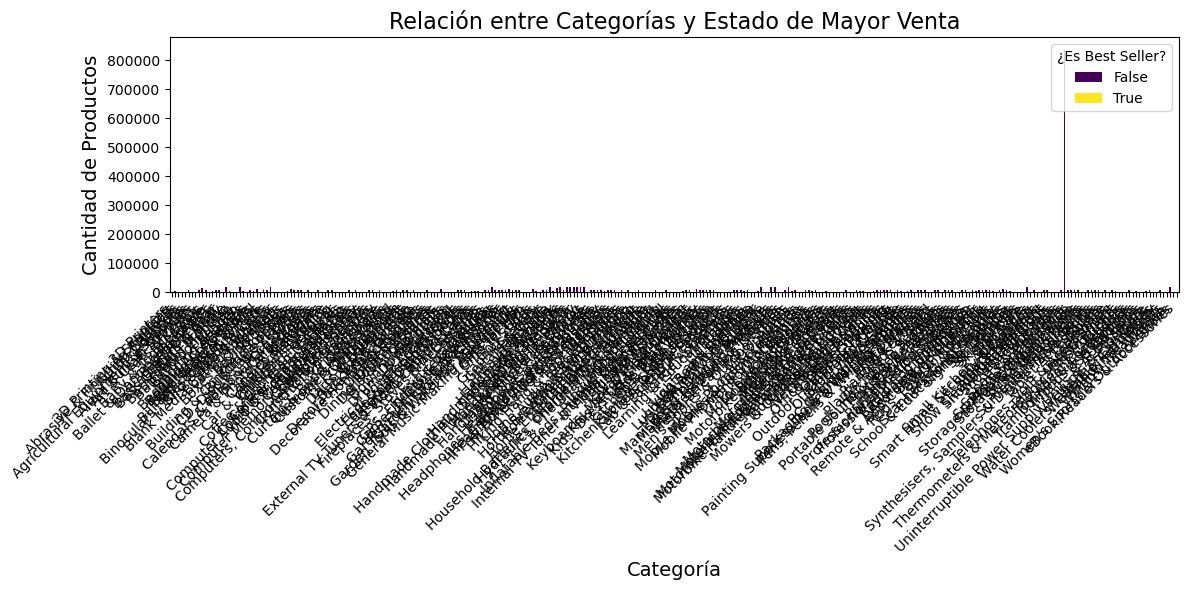

In [23]:
# Gráfico de barras apilado 

contingency_table = pd.crosstab(data_amazon['category'], data_amazon['isBestSeller'])

contingency_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap= 'viridis')

plt.title('Relación entre Categorías y Estado de Mayor Venta', fontsize=16)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Cantidad de Productos', fontsize=14)
plt.legend(title='¿Es Best Seller?', loc='upper right')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

plt.show()


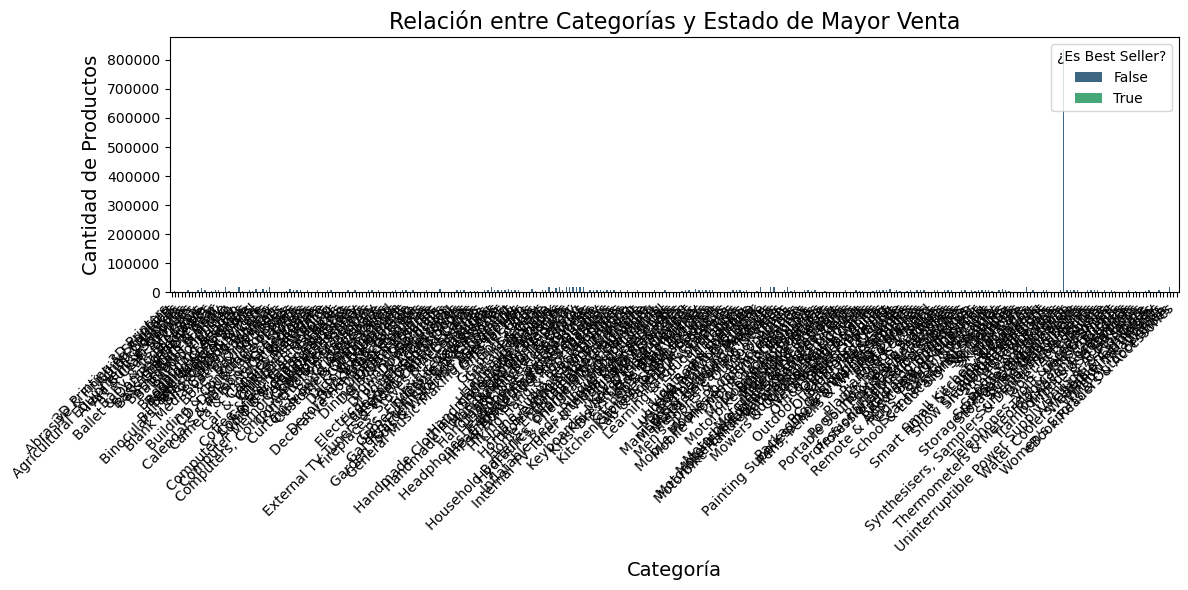

In [ ]:
# Crear el DataFrame necesario para Seaborn
stacked_data = data_amazon.groupby(['category', 'isBestSeller']).size().reset_index(name='counts')

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=stacked_data, 
    x='category', 
    y='counts', 
    hue='isBestSeller', 
    palette="viridis"
)

# Personalizar el gráfico
plt.title('Relación entre Categorías y Estado de Mayor Venta', fontsize=16)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Cantidad de Productos', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='¿Es Best Seller?', loc='upper right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
# Paso preliminar: eliminar valores atípicos en los precios de los productos.

# Para este fin, podemos utilizar el método IQR (rango intercuartil). 
# Los productos cuyo precio sea inferior al primer cuartil menos 1,5 veces el IQR o superior al tercer cuartil más 1,5 veces 
# el IQR se considerarán valores atípicos y se eliminarán del conjunto de datos. Los siguientes pasos se realizarán con el marco de 
# datos sin valores atípicos.

# Sugerencia: puede consultar la última verificación de comprensión al final de la lección Análisis bivariado de EDA para 
# obtener una pista sobre cómo hacer esto.

In [26]:
Q1 = data_amazon['price'].quantile(0.25)
Q3 = data_amazon['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
higher_bound = Q3 + 1.5 * IQR

filtered_data = data_amazon[(data_amazon['price'] >= lower_bound) & (data_amazon['price'] <= higher_bound)]

print(f"Tamaño original: {data_amazon.shape[0]}")
print(f"Tamaño después de eliminar valores atípicos: {filtered_data.shape[0]}")


Tamaño original: 2115963
Tamaño después de eliminar valores atípicos: 1958911


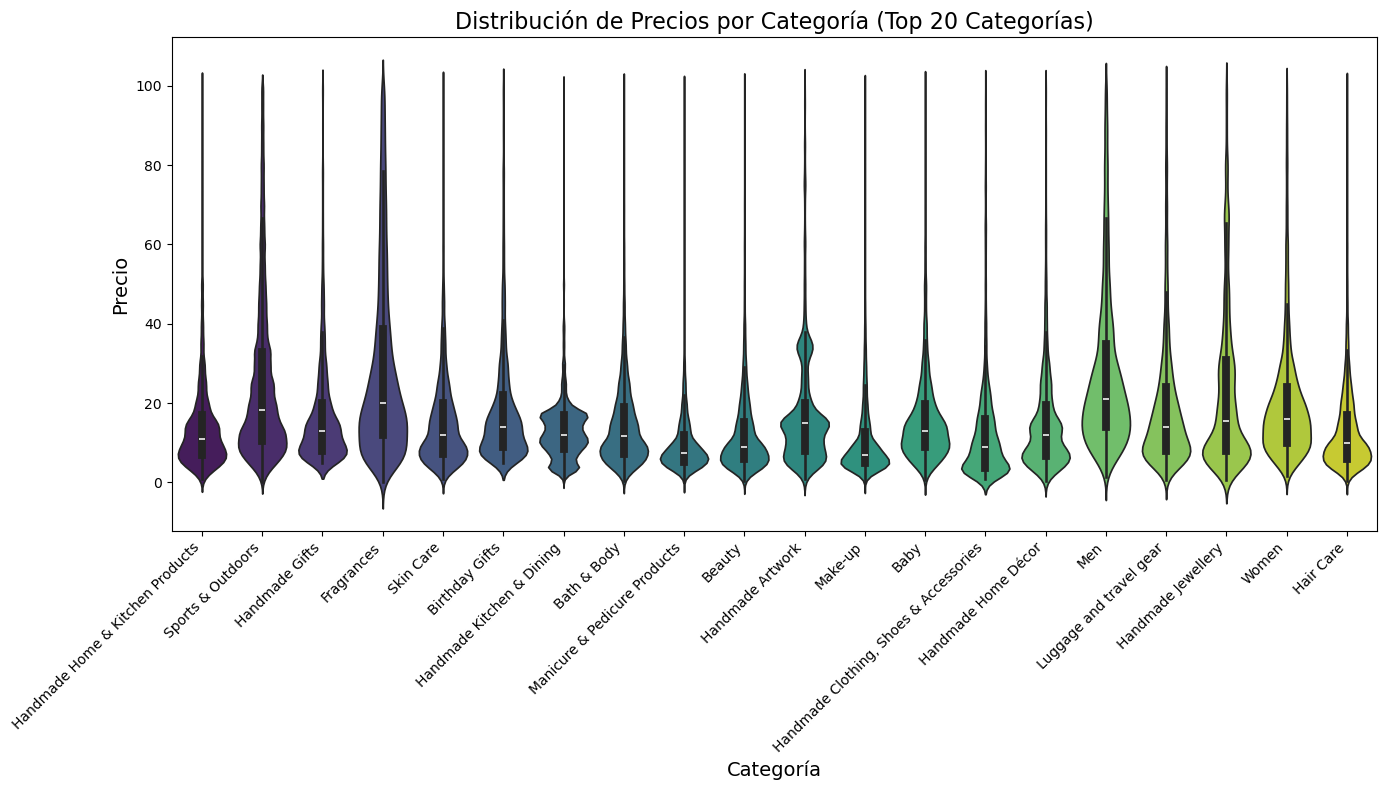

La categoría con el precio medio más alto es: Motherboards
El precio medio más alto es: $68.77


In [27]:
# Gráfico violin sobre la distribución de price en los distintas categories 

top_categories = data_amazon['category'].value_counts().head(20).index
filtered_data = data_amazon[data_amazon['category'].isin(top_categories)]

# Crear el gráfico de violín para las 20 categorías principales
plt.figure(figsize=(14, 8))
sns.violinplot(data=filtered_data, x='category', y='price', palette='viridis')

# Personalizar el gráfico
plt.title('Distribución de Precios por Categoría (Top 20 Categorías)', fontsize=16)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Identificar la categoría con el precio medio más alto (sin filtrar por las 20 principales)
highest_mean_price_category = data_amazon.groupby('category')['price'].mean().idxmax()
highest_mean_price_value = data_amazon.groupby('category')['price'].mean().max()

print(f"La categoría con el precio medio más alto es: {highest_mean_price_category}")
print(f"El precio medio más alto es: ${highest_mean_price_value:.2f}")

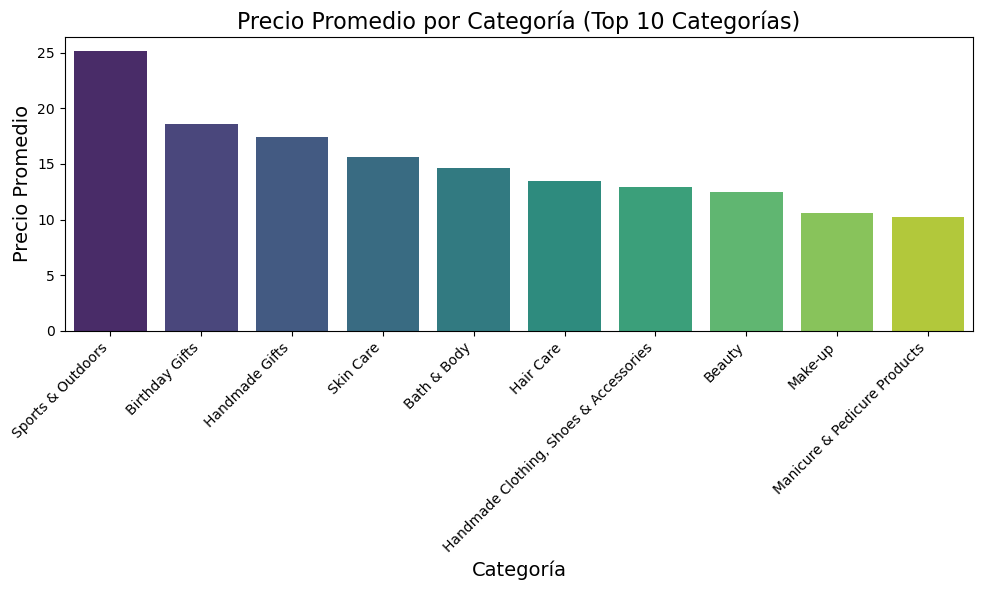

La categoría con el precio promedio más alto es: Motherboards
El precio promedio más alto es: $68.77


In [28]:
# Crear un gráfico de barras que compare el precio medio promedio de 
# los productos para las 10 categories de productos principales (según el recuento)

top_10_categories = data_amazon['category'].value_counts().head(10).index
filtered_data = data_amazon[data_amazon['category'].isin(top_10_categories)]

# Calcular el precio promedio para las 10 categorías principales
avg_price_top_10 = filtered_data.groupby('category')['price'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_top_10.index, y=avg_price_top_10.values, palette='viridis')

# Personalizar el gráfico
plt.title('Precio Promedio por Categoría (Top 10 Categorías)', fontsize=16)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Precio Promedio', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Categoría con el precio promedio más alto (sin filtrar por las 10 principales)
highest_avg_price_category = data_amazon.groupby('category')['price'].mean().idxmax()
highest_avg_price_value = data_amazon.groupby('category')['price'].mean().max()

print(f"La categoría con el precio promedio más alto es: {highest_avg_price_category}")
print(f"El precio promedio más alto es: ${highest_avg_price_value:.2f}")

float64
0
                               category  stars
19513  Handmade Home & Kitchen Products    4.5
19514  Handmade Home & Kitchen Products    3.9
19515  Handmade Home & Kitchen Products    4.6
19516  Handmade Home & Kitchen Products    4.5
19517  Handmade Home & Kitchen Products    4.7


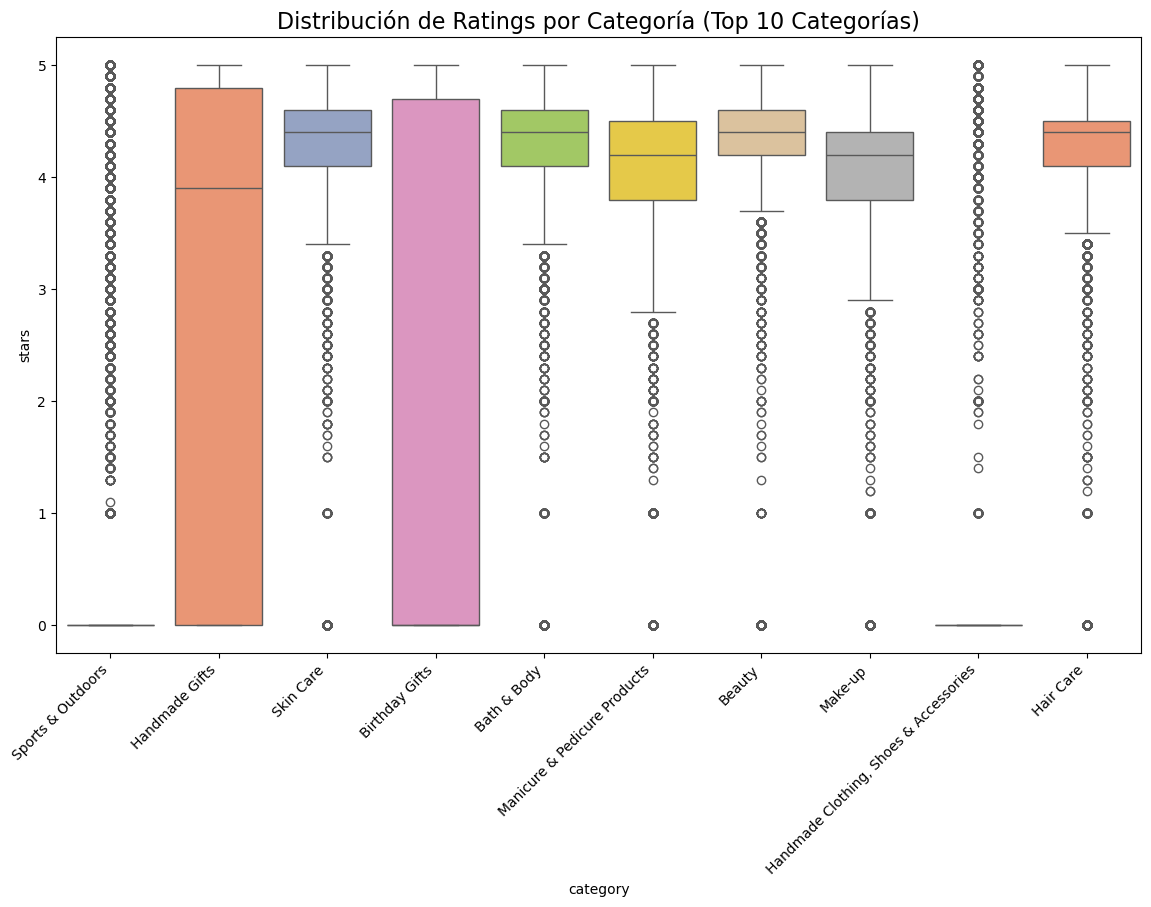

La categoría con la calificación media más alta es: Beauty


In [40]:
top_categories = data_amazon['category'].value_counts().head(20).index
filtered_data = data_amazon[data_amazon['category'].isin(top_categories)]

# Verifica el tipo de datos de la columna 'rating'
print(filtered_data['stars'].dtype)

# Si la columna 'rating' no es numérica, conviértela a tipo numérico
filtered_data['stars'] = pd.to_numeric(filtered_data['stars'], errors='coerce')

# Verifica si hay valores nulos en la columna 'rating'
print(filtered_data['stars'].isnull().sum())

# Elimina filas con valores nulos en la columna 'rating'
filtered_data = filtered_data.dropna(subset=['stars'])

# Verifica los primeros 5 registros después de limpiar los datos
print(filtered_data[['category', 'stars']].head())

# Filtrar las 10 categorías principales según el recuento de productos
top_10_categories = filtered_data['category'].value_counts().head(10).index
filtered_data_top_10 = filtered_data[filtered_data['category'].isin(top_10_categories)]

# Crear el gráfico de cajas para las 10 categorías principales
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_data_top_10, x='category', y='stars', palette='Set2')
plt.title('Distribución de Ratings por Categoría (Top 10 Categorías)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

# Para ver cuál categoría tiene la calificación media más alta (sin filtrar por categorías principales)
mean_ratings = filtered_data.groupby('category')['stars'].mean()
highest_mean_category = mean_ratings.idxmax()

print(f"La categoría con la calificación media más alta es: {highest_mean_category}")

In [ ]:
# Objetivo : Analizar cómo las calificaciones de los productos ( stars) se correlacionan con los precios de los productos.

# Coeficientes de correlación :

# Calcular el coeficiente de correlación entre pricey stars.

# ¿Existe una correlación significativa entre el precio del producto y su calificación?

In [41]:
coeficiente_pricestars = data_amazon['price'].corr(data_amazon['stars'])
print(coeficiente_pricestars)

-0.0776729987818137


In [ ]:
# Visualizaciones :

# Utilice un diagrama de dispersión para visualizar la relación entre la calificación del producto y el precio. 
# ¿Qué patrones puede observar?
# Utilice un mapa de calor de correlación para visualizar las correlaciones entre todas las variables numéricas.
# Examine si los precios de los productos suelen seguir una distribución normal utilizando un gráfico QQ.

float64
0
                               category  stars
19513  Handmade Home & Kitchen Products    4.5
19514  Handmade Home & Kitchen Products    3.9
19515  Handmade Home & Kitchen Products    4.6
19516  Handmade Home & Kitchen Products    4.5
19517  Handmade Home & Kitchen Products    4.7


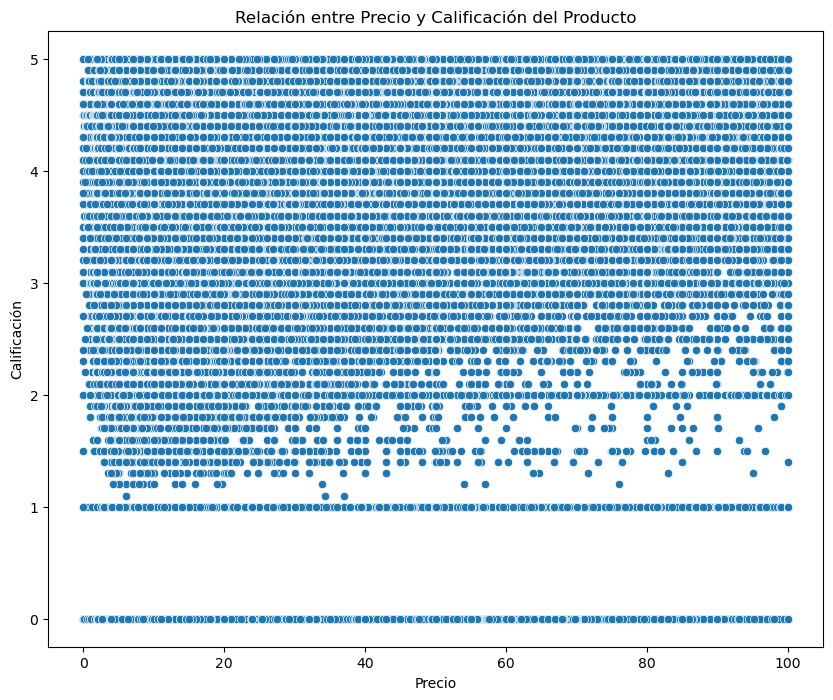

La categoría con la calificación media más alta es: Beauty


In [46]:
top_categories = data_amazon['category'].value_counts().head(20).index
filtered_data = data_amazon[data_amazon['category'].isin(top_categories)]

# Verifica el tipo de datos de la columna 'rating'
print(filtered_data['stars'].dtype)

# Si la columna 'rating' no es numérica, conviértela a tipo numérico
filtered_data['stars'] = pd.to_numeric(filtered_data['stars'], errors='coerce')

# Verifica si hay valores nulos en la columna 'rating'
print(filtered_data['stars'].isnull().sum())

# Elimina filas con valores nulos en la columna 'rating'
filtered_data = filtered_data.dropna(subset=['stars'])

# Verifica los primeros 5 registros después de limpiar los datos
print(filtered_data[['category', 'stars']].head())

# Filtrar las 10 categorías principales según el recuento de productos
top_10_categories = filtered_data['category'].value_counts().head(10).index
filtered_data_top_10 = filtered_data[filtered_data['category'].isin(top_10_categories)]

plt.figure(figsize=(10,8))
sns.scatterplot(data=data_amazon, x='price', y='stars', palette='Set2')
plt.title('Relación entre Precio y Calificación del Producto')
plt.xlabel('Precio')
plt.ylabel('Calificación')
plt.show()

# Para ver cuál categoría tiene la calificación media más alta (sin filtrar por categorías principales)
mean_ratings = filtered_data.groupby('category')['stars'].mean()
highest_mean_category = mean_ratings.idxmax()

print(f"La categoría con la calificación media más alta es: {highest_mean_category}")


float64
0
                category  stars
82163  Sports & Outdoors    4.2
82164  Sports & Outdoors    4.2
82167  Sports & Outdoors    4.5
82168  Sports & Outdoors    4.7
82169  Sports & Outdoors    4.2


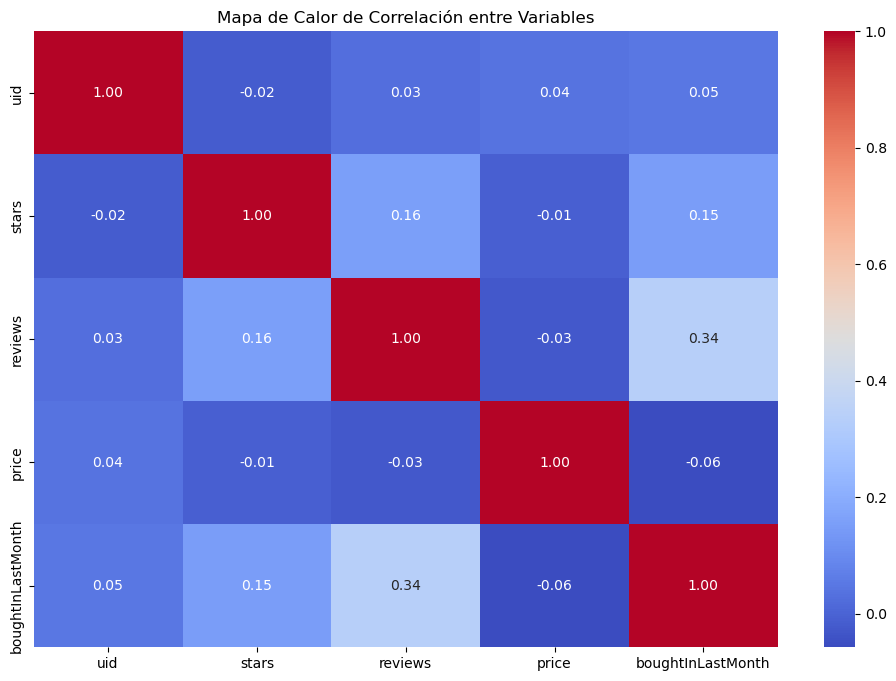

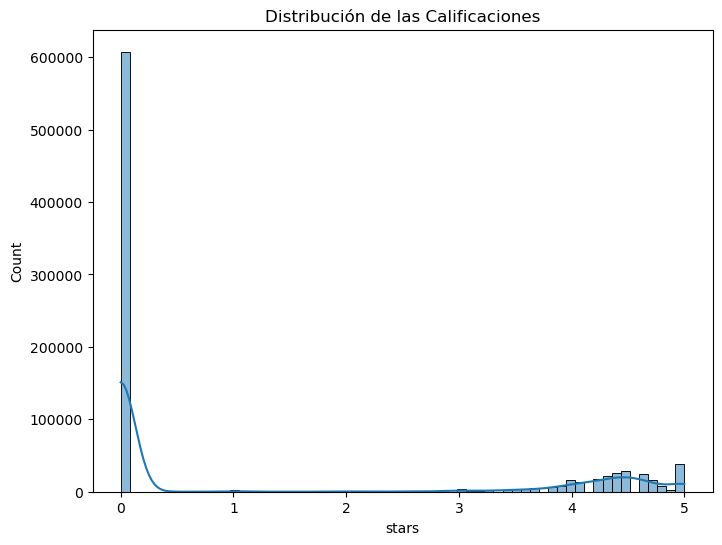

In [51]:
# Elimina filas con valores nulos en 'category' antes de filtrar
data_amazon = data_amazon.dropna(subset=['category'])

# Filtra las 10 categorías principales según el recuento
top_10_categories = data_amazon['category'].value_counts().head(10).index
filtered_data = data_amazon[data_amazon['category'].isin(top_10_categories)]

# Verifica el tipo de datos de la columna 'stars'
print(filtered_data['stars'].dtype)

# Convierte la columna 'stars' a numérica
filtered_data['stars'] = pd.to_numeric(filtered_data['stars'], errors='coerce')

# Verifica si hay valores nulos en la columna 'stars'
print(filtered_data['stars'].isnull().sum())

# Elimina filas con valores nulos en 'stars'
filtered_data = filtered_data.dropna(subset=['stars'])

# Verifica los primeros 5 registros después de limpiar los datos
print(filtered_data[['category', 'stars']].head())

# Filtrar solo las columnas numéricas antes de calcular la correlación
numeric_columns = filtered_data.select_dtypes(include=['float64', 'int64'])

# Calculando la matriz de correlación solo con columnas numéricas
corr_matrix = numeric_columns.corr()

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()

# Histograma para visualizar la distribución de las calificaciones
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['stars'], kde=True)
plt.title('Distribución de las Calificaciones')
plt.show()



In [58]:
import scipy.stats as stats

float64
0
                category  stars
82163  Sports & Outdoors    4.2
82164  Sports & Outdoors    4.2
82167  Sports & Outdoors    4.5
82168  Sports & Outdoors    4.7
82169  Sports & Outdoors    4.2


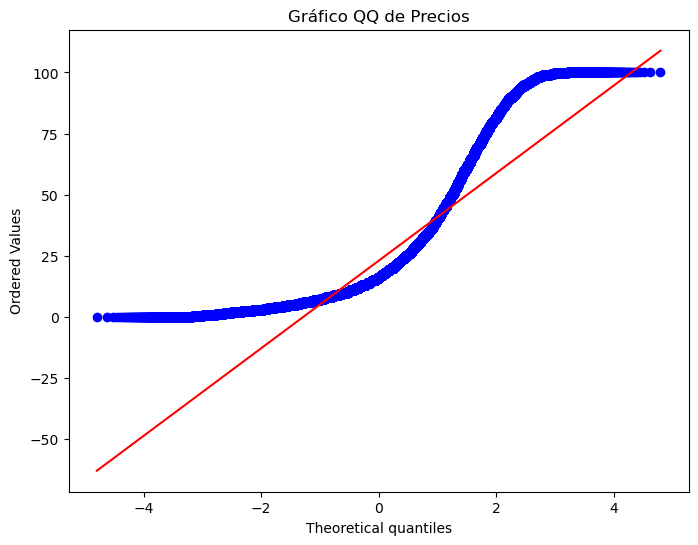

In [59]:
# Elimina filas con valores nulos en 'category' antes de filtrar
data_amazon = data_amazon.dropna(subset=['category'])

# Filtra las 10 categorías principales según el recuento
top_10_categories = data_amazon['category'].value_counts().head(10).index
filtered_data = data_amazon[data_amazon['category'].isin(top_10_categories)]

# Verifica el tipo de datos de la columna 'stars'
print(filtered_data['stars'].dtype)

# Convierte la columna 'stars' a numérica
filtered_data['stars'] = pd.to_numeric(filtered_data['stars'], errors='coerce')

# Verifica si hay valores nulos en la columna 'stars'
print(filtered_data['stars'].isnull().sum())

# Elimina filas con valores nulos en 'stars'
filtered_data = filtered_data.dropna(subset=['stars'])

# Verifica los primeros 5 registros después de limpiar los datos
print(filtered_data[['category', 'stars']].head())

# Gráfico QQ para verificar la normalidad de los precios
plt.figure(figsize=(8, 6))
stats.probplot(filtered_data['price'].dropna(), dist="norm", plot=plt)
plt.title('Gráfico QQ de Precios')
plt.show()